In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from msilib.schema import Directory
import numpy as np
import pandas as pd
import os
from scipy.io import loadmat
from sklearn.linear_model import LinearRegression


Combined Data

In [31]:
TH1 = np.array([])
TH2 = np.array([])
ANS = np.array([])
FINAL=np.array([])
T = np.array([])
th2_t=np.array([])
ans_t=np.array([])
PAYLOAD = []
abhi=[]
directories = ["AARYAN", "ABHAY", "ARJUN", "ABHISHEK","ADITYA","ANANT","AYUSH","DHRUV","DIVYANG","GAURAV","JATIN","KARTIK","LIKHITH","MANOJ","PRABAL"]
for directory in directories:
    for filename in os.listdir(directory):
        if filename[-1]=="t":
            payload = filename[2]
            if(filename[4]!="m"):
                payload+=""+".5"
            payload = float(payload)
            f = os.path.join(directory, filename)
            mat = loadmat(f, squeeze_me=True)
            th1 = np.array(mat['th1'])
            th2 = np.array(mat['th2'])
            ans = np.array(mat['ans'])
            t = np.array(mat['t'])
            FINAL=np.concatenate([FINAL,th1])
            FINAL=np.concatenate([FINAL,th2])
            FINAL=np.concatenate([FINAL,ans])
            TH1 = np.concatenate([TH1, th1])
            TH2 = np.concatenate([TH2, th2])
            T = np.concatenate([T, t])
            ANS = np.concatenate([ANS, ans])
            PAYLOAD.append(payload)

d = {"t": T, "th1": TH1, "th2": TH2, "ans": ANS}
d= pd.DataFrame(d)
print(PAYLOAD)
FINAL=FINAL.reshape(90,63)
FINAL=pd.DataFrame(FINAL)
FINAL.info()
FINAL.to_csv("FINAL_PAYLOAD.csv", header=False, index=False)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\io\matlab\_mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


[0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0, 0.0, 2.5, 5.5, 0.0, 2.5, 5.0, 0.0, 2.5, 5.0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90 non-null     float64
 1   1       90 non-null     float64
 2   2       90 non-null     float64
 3   3       90 non-null     float64
 4   4       90 non-null     float64
 5   5       90 non-null     float64
 6   6       90 non-null     float64
 7   7       90 non-null     float64
 8   8       90 non-null     float64
 9   9       90 non-null     float64
 1

In [33]:
print(d.shape)
print(d)
PAYLOAD=pd.DataFrame(PAYLOAD)
PAYLOAD.to_csv("FINAL_PAYLOAD_Y.csv", header=False, index=False)

(1890, 4)
         t        th1        th2       ans
0      0.0 -90.000000 -90.000000  1.060606
1      1.0 -89.901276 -88.016853  1.060606
2      2.0 -89.950638 -85.505444  1.080156
3      3.0 -87.622389 -41.088147  0.923754
4      4.0 -88.387502 -20.849655  0.928641
...    ...        ...        ...       ...
1885  16.0 -81.970420   5.658698  1.373412
1886  17.0 -82.480495   7.667826  1.085044
1887  18.0 -77.708819 -43.002014  0.708700
1888  19.0 -77.231651 -57.654786  0.708700
1889  20.0 -76.178591 -56.113300  0.703812

[1890 rows x 4 columns]


Train Test Split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(d, PAYLOAD, test_size = 0.7)
print(y_train)
ANS.shape
data_ans=pd.DataFrame(ANS)
data_ans.to_csv("DATAFRAME_Y.csv", header=False, index=False)

[0, 2, 0, 5, 0, 5, 2, 0, 2, 2, 2, 5, 0, 0, 0, 2, 2, 0, 2, 5, 0, 0, 5, 0, 5, 2, 2, 0, 2, 5, 5, 0, 5, 5, 2, 5, 5, 2, 2, 2, 5, 0, 5, 2, 0, 2, 0, 5, 0, 5, 5, 5, 5, 5, 0, 2, 0, 5, 2, 0, 0, 2, 2, 5, 2, 2, 2, 5, 5, 5, 0, 5, 5, 5, 0, 2, 5, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 5, 5, 2, 5, 5, 5, 2, 0, 0, 0, 0, 2, 5, 2, 2, 0, 5, 5, 2, 2, 2, 0, 5, 5, 5, 5, 0, 2, 5, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 5, 5, 2, 5, 2, 0, 5, 0, 2, 5, 5, 5, 2, 2, 5, 0, 5, 5, 5, 5, 5, 2, 0, 0, 0, 5, 2, 5, 0, 0, 5, 0, 0, 0, 2, 5, 2, 2, 5, 0, 5, 5, 5, 0, 5, 0, 2, 5, 2, 2, 2, 5, 5, 2, 2, 2, 0, 5, 5, 2, 5, 2, 0, 5, 5, 0, 5, 5, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 5, 2, 2, 0, 2, 0, 5, 5, 2, 2, 5, 2, 5, 2, 2, 0, 2, 0, 5, 2, 2, 2, 5, 5, 5, 0, 2, 2, 0, 2, 0, 2, 2, 5, 2, 5, 0, 0, 5, 5, 0, 5, 2, 5, 5, 5, 2, 5, 2, 0, 5, 0, 5, 0, 0, 2, 5, 5, 0, 2, 5, 0, 2, 5, 2, 0, 0, 0, 5, 2, 0, 0, 2, 5, 0, 0, 0, 2, 5, 5, 0, 2, 2, 5, 5, 0, 0, 0, 5, 2, 0, 5, 2, 5, 2, 0, 0, 5, 0, 2, 0, 2, 2, 5, 0, 0, 2, 2, 0, 5, 0, 5, 2, 0, 0, 2, 5, 0, 5, 5, 5, 5, 0, 2, 5, 5, 

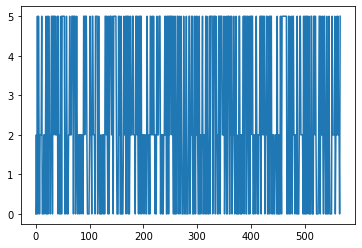

[0, 2, 0, 5, 0, 5, 2, 0, 2, 2, 2, 5, 0, 0, 0, 2, 2, 0, 2, 5, 0, 0, 5, 0, 5, 2, 2, 0, 2, 5, 5, 0, 5, 5, 2, 5, 5, 2, 2, 2, 5, 0, 5, 2, 0, 2, 0, 5, 0, 5, 5, 5, 5, 5, 0, 2, 0, 5, 2, 0, 0, 2, 2, 5, 2, 2, 2, 5, 5, 5, 0, 5, 5, 5, 0, 2, 5, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 5, 5, 2, 5, 5, 5, 2, 0, 0, 0, 0, 2, 5, 2, 2, 0, 5, 5, 2, 2, 2, 0, 5, 5, 5, 5, 0, 2, 5, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 5, 5, 2, 5, 2, 0, 5, 0, 2, 5, 5, 5, 2, 2, 5, 0, 5, 5, 5, 5, 5, 2, 0, 0, 0, 5, 2, 5, 0, 0, 5, 0, 0, 0, 2, 5, 2, 2, 5, 0, 5, 5, 5, 0, 5, 0, 2, 5, 2, 2, 2, 5, 5, 2, 2, 2, 0, 5, 5, 2, 5, 2, 0, 5, 5, 0, 5, 5, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 5, 2, 2, 0, 2, 0, 5, 5, 2, 2, 5, 2, 5, 2, 2, 0, 2, 0, 5, 2, 2, 2, 5, 5, 5, 0, 2, 2, 0, 2, 0, 2, 2, 5, 2, 5, 0, 0, 5, 5, 0, 5, 2, 5, 5, 5, 2, 5, 2, 0, 5, 0, 5, 0, 0, 2, 5, 5, 0, 2, 5, 0, 2, 5, 2, 0, 0, 0, 5, 2, 0, 0, 2, 5, 0, 0, 0, 2, 5, 5, 0, 2, 2, 5, 5, 0, 0, 0, 5, 2, 0, 5, 2, 5, 2, 0, 0, 5, 0, 2, 0, 2, 2, 5, 0, 0, 2, 2, 0, 5, 0, 5, 2, 0, 0, 2, 5, 0, 5, 5, 5, 5, 0, 2, 5, 5, 

In [15]:
import matplotlib.pyplot as plt
plt.plot(list(y_train))
plt.show()
print(list(y_train))

Using linear regression

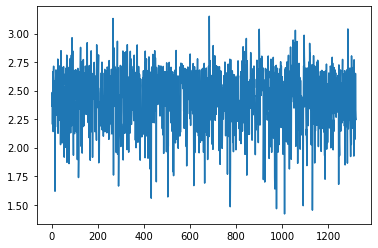

Mean absolute percentage error:  0.7394590122298965


In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
plt.plot(pred)
plt.show()
mape = mean_absolute_percentage_error(pred, y_test)
print("Mean absolute percentage error: ", mape)

Polynomial regression degree 2

In [17]:
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
poly_pred=pipe.predict(x_test)
mape = mean_absolute_percentage_error(poly_pred, y_test)
print("Mean absolute percentage error: ", mape)
temp=pd.DataFrame(x_train)
temp.to_csv('x_train.csv', header=False, index=False)
temp=pd.DataFrame(x_test)
temp.to_csv('x_test.csv', header=False, index=False)
temp=pd.DataFrame(y_train)
temp.to_csv('y_train.csv', header=False, index=False)
temp=pd.DataFrame(y_test)
temp.to_csv('y_test.csv', header=False, index=False)


Mean absolute percentage error:  0.7838653241728533


Coefficients to determine equation of hyperplane obtained by regression analysis

In [18]:
print(model.coef_)
print(model.intercept_)

[-0.03735438 -0.01378415  0.00102369 -0.03003692]
1.5887887656759605
